In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [1]:
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *

from sklearn.model_selection import train_test_split 

In [2]:
DATA_PATH = Path('../data')

In [3]:
!python ../modules/data_import.py -d ../data/

Converting to use_cartesian coordinates
Converting to use_cartesian coordinates
Training on 200000 datapoints and validating on 50000, using 31 feats:
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_met_pt']
Saving fold 0 with 20001 events
Saving fold 1 with 20001 events
Saving fold 2 with 20001 events
Saving fold 3 with 20001 events
Saving fold 4 with 20000 events
Saving fold 5 with 20000 events
Saving fold 6 with 19999 events
Saving fold 7 with 19999 events
Saving 

In [4]:
train_fy = FoldYielder(DATA_PATH/'train.hdf5', input_pipe=DATA_PATH/'input_pipe.pkl')
train_df = train_fy.get_df(inc_inputs=True, deprocess=True, suppress_warn=True); train_df.head()

200000 datapoints loaded


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_subleading_py,PRI_jet_subleading_pz,PRI_met_px,PRI_met_py,PRI_lep_px,PRI_lep_py,PRI_lep_pz,PRI_met_pt,gen_target,gen_weight
0,115.596001,0.411999,77.398003,51.362000,0.413,140.010986,-0.036,2.296,1.878001,237.899002,...,-43.866619,13.646721,-9.776644,-4.851044,-24.132952,-11.261030,23.865280,10.914001,0,0.000004
1,NaN,104.417999,72.371002,4.672000,NaN,NaN,NaN,1.871,4.671999,91.399994,...,NaN,NaN,-58.156414,-6.575796,43.068153,-32.604885,121.121078,58.527000,0,0.000014
2,94.684998,17.481001,68.537003,92.848000,NaN,NaN,NaN,1.585,2.310999,194.169998,...,NaN,NaN,15.469403,1.990969,19.372574,25.868059,35.341293,15.597001,1,0.000003
3,154.244003,14.528999,104.112000,68.668999,4.188,479.847992,-3.409,2.689,4.597000,224.929001,...,-22.989014,64.058533,12.450205,31.371801,41.038269,49.642521,-62.926125,33.751999,1,0.000003
4,NaN,65.726997,53.835999,1.832999,NaN,NaN,NaN,2.079,1.833001,53.760002,...,NaN,NaN,19.728762,-33.998455,-28.055946,11.980858,-17.884775,39.307999,0,0.000016


In [5]:
plot_settings.savepath

PosixPath('.')

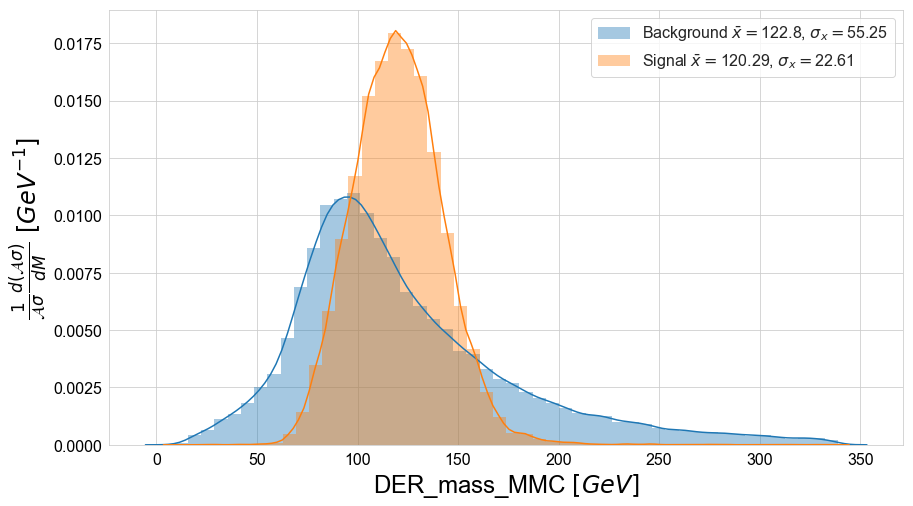

In [6]:
plot_feat(train_df, 'DER_mass_MMC', cuts=[(train_df.gen_target==0), (train_df.gen_target==1)], 
          labels=['Background', 'Signal'], wgt_name='gen_weight', 
          ax_labels={'y':r"$\frac{1}{\mathcal{A}\sigma} \frac{d(\mathcal{A}\sigma)}{dM}\ [GeV^{-1}]$",
                     'x':'DER_mass_MMC $[GeV]$'}, settings=plot_settings, savename='plots/hl_feat')

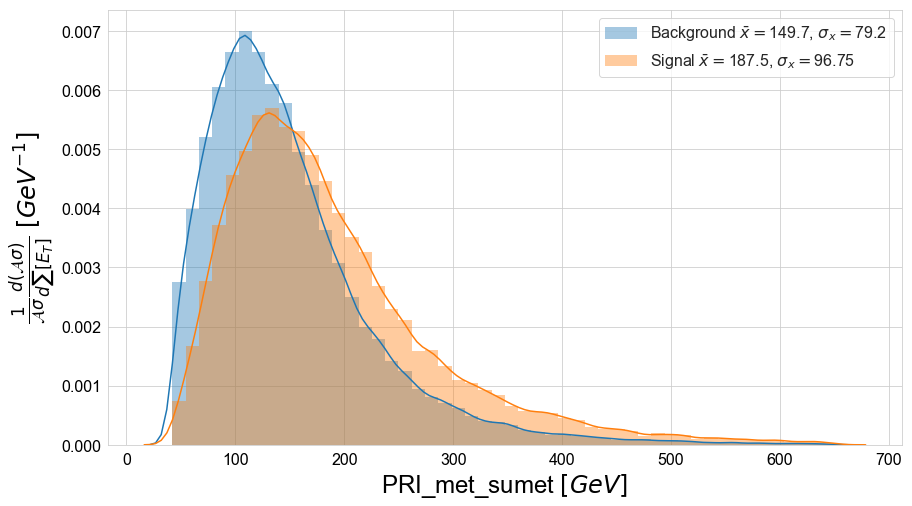

In [7]:
plot_feat(train_df, 'PRI_met_sumet', cuts=[(train_df.gen_target==0), (train_df.gen_target==1)], 
          labels=['Background', 'Signal'], wgt_name='gen_weight', 
          ax_labels={'y':r"$\frac{1}{\mathcal{A}\sigma} \frac{d(\mathcal{A}\sigma)}{d\sum[E_T]}\ [GeV^{-1}]$",
                     'x':'PRI_met_sumet $[GeV]$'}, settings=plot_settings, savename='plots/ll_feat')

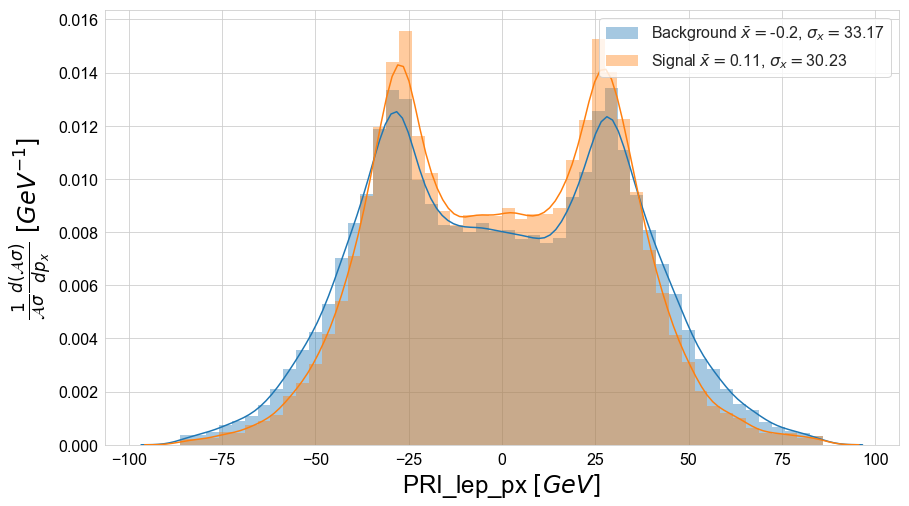

In [8]:
plot_feat(train_df, 'PRI_lep_px', cuts=[(train_df.gen_target==0), (train_df.gen_target==1)], 
          labels=['Background', 'Signal'], wgt_name='gen_weight', 
          ax_labels={'y':r"$\frac{1}{\mathcal{A}\sigma} \frac{d(\mathcal{A}\sigma)}{dp_x}\ [GeV^{-1}]$",
                     'x':'PRI_lep_px $[GeV]$'}, settings=plot_settings, savename='plots/ll_feat')